# Coleta de base

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import folium
from folium.plugins import HeatMap
from IPython.display import display

In [2]:
# Visualizar todas as colunas das bases
pd.set_option('display.max_columns', None)

# Dataset já tratado na etapa anterior (Data Clean)
df = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Federal-road-accidents---Brazil/main/1%20-%20Data%20Clean/Federal_Accidents_Data_Clean.csv', encoding='ISO-8859-1', sep = ',')
df.head()

id data_inversa   dia_semana   horario  uf      br     km  \
0  331730.0   2021-01-01  sexta-feira  05:30:00  SP  br-116  453.0   
1  331804.0   2021-01-01  sexta-feira  08:05:00  AM  br-174  937.0   
2  331815.0   2021-01-01  sexta-feira  10:10:00  CE  br-222  128.5   
3  331823.0   2021-01-01  sexta-feira  12:30:00  RJ  br-493   18.0   
4  331843.0   2021-01-01  sexta-feira  14:40:00  RJ  br-393  252.0   

        municipio                                     causa_acidente  \
0        REGISTRO           Reação tardia ou ineficiente do condutor   
1          MANAUS           Reação tardia ou ineficiente do condutor   
2         ITAPAJE                            Velocidade Incompatível   
3            MAGE  Ingestão de álcool e/ou substâncias psicoativa...   
4  BARRA DO PIRAI                                  Condutor Dormindo   

      tipo_acidente classificacao_acidente   fase_dia  sentido_via  \
0        Tombamento    Com Vítimas Feridas  Amanhecer    Crescente   
1  Colisão traseira    Com Vítimas Feridas  Pleno dia    Crescente   
2        Tombamento    Com Vítimas Feridas  Pleno dia    Crescente   
3   Colisão lateral    Com Vítimas Feridas  Pleno dia  Decrescente   
4   Colisão frontal    Com Vítimas Feridas  Pleno dia    Crescente   

  condicao_metereologica tipo_pista uso_solo  pessoas  mortos  feridos_leves  \
0                Nublado      Dupla    Rural        1       0              1   
1              Céu Claro    Simples    Rural        6       0              1   
2              Céu Claro    Simples    Rural        3       0              2   
3                Nublado    Simples   Urbano        2       0              1   
4                Nublado    Simples    Rural        3       0              1   

   feridos_graves  ilesos  ignorados  feridos  veiculos   latitude  longitude  \
0               0       0          0        1         1 -24.561681 -47.867522   
1               0       5          0        1         4  -2.508068 -60.036434   
2               0       0          1        2         2  -3.707626 -39.623509   
3               0       1          0        1         2 -22.668712 -43.018627   
4               1       1          0        2         2 -22.434220 -43.775615   

  regional delegacia             uop   ano  mes  dia  ano_mes  horas  minutos  \
0  SPRF-SP  DEL05-SP  UOP01-DEL05-SP  2021    1    1  2021-01      5       30   
1  SPRF-AM  DEL01-AM  UOP01-DEL01-AM  2021    1    1  2021-01      8        5   
2  SPRF-CE  DEL04-CE  UOP03-DEL04-CE  2021    1    1  2021-01     10       10   
3  SPRF-RJ  DEL02-RJ  UOP04-DEL02-RJ  2021    1    1  2021-01     12       30   
4  SPRF-RJ  DEL05-RJ  UOP02-DEL05-RJ  2021    1    1  2021-01     14       40   

     regiao  obitos  
0   Sudeste       0  
1     Norte       0  
2  Nordeste       0  
3   Sudeste       0  
4   Sudeste       0

# Statistic

Está é a segunda etapa do estudo. Nela focarei em realizar a análise **exploratória dos dados, seu comportamento, distribuição, proporção e hipoteses**. O objetivo é compreender com o que estou trabalhando e identificar o que será necessário realizar na próxima etapa (Pré-processamento).

Nesta etapa, apresentarei diversos **gráficos** de diferentes tipos e formato. Para que a visualização seja acessivel utilizarei a **palette "viridis"**, da qual é amigável para pessoas daltônicas.

Também vou seperar a investigação em etapas conforme a **categoria das features**, exemplo variaveis regionais e temporais.

In [3]:
# Aplicando a palette viridis do Seaborn
sns.set_palette("viridis")

## Target



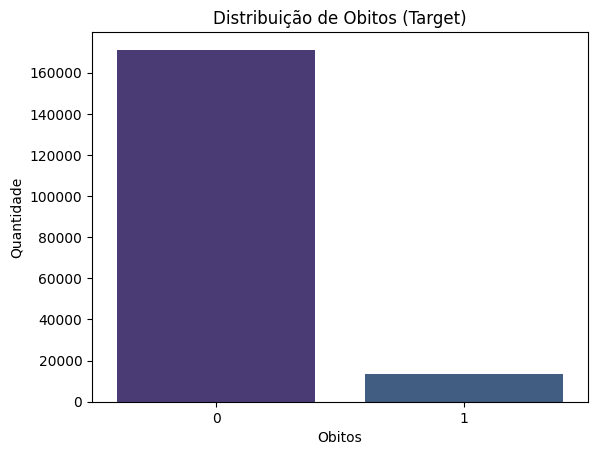

In [4]:
# Distribuição da variavel target
sns.countplot(x = 'obitos', data = df)

plt.title('Distribuição de Obitos (Target)')
plt.ylabel('Quantidade')
plt.xlabel('Obitos')
plt.show()

Note que a variável alvo está meio desbalanceada, com cerca de 7,22% dos casos sendo acidentes com vítimas. Esse desequilíbrio complica a vida dos modelos de machine learning, já que, ao ter uma categoria muito mais comum, eles podem não pegar direito os padrões da categoria menos frequente. Isso pode causar uns tropeços na precisão das previsões. Alguns modelos conseguem dar conta de desbalanceamento, mas essa proporção é um alerta que irei abordar nos próximos passos.

**Obs**: Visando isso deixarei dois datasets separados por target para as proximas analises.

In [5]:
df_sem_obitos = df[df['obitos'] == 0]
df_obitos = df[df['obitos'] == 1]

# Análise Temporal

Nesta parte irei explorar variáveis que contenham informações sobre tempo, períodos e horas.

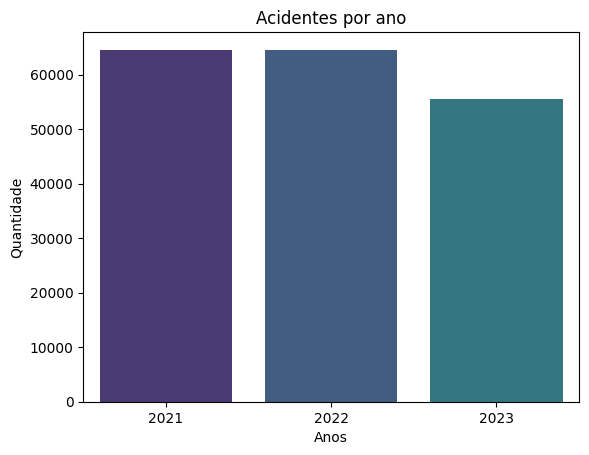

In [6]:
# Número de ocorrencia por ano
sns.countplot(x = 'ano' , data = df)

plt.title('Acidentes por ano')
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.show()

Como relatado anteriormente, os valores decorrentes de cada ano são muito proximos, mesmo com os dados 2023 atualizados até outubro reconhecesse uma volumetria próxima.

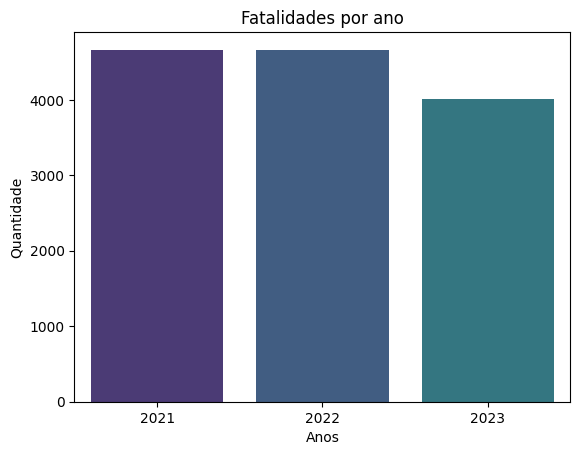

In [7]:
# Número de acidentes que houveram vítimas fatais
sns.countplot(x='ano', data = df_obitos)

plt.title('Fatalidades por ano')
plt.ylabel('Quantidade')
plt.xlabel('Anos')
plt.show()

Como dito antes, os números de casos com vítimas fatais são proximos. Parece até que não houve tentativa de mudar esse cenário.

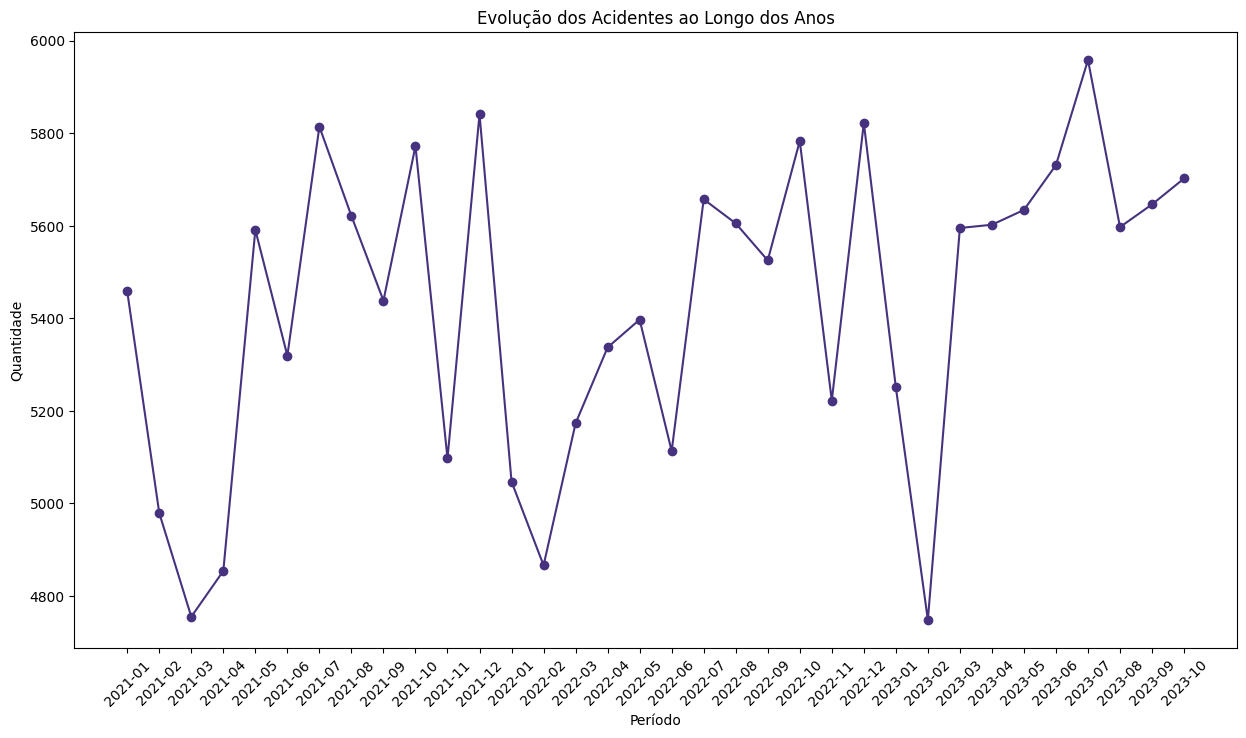

In [8]:
# Acidentes ao longo dos anos
count_por_mes = df['ano_mes'].value_counts().sort_index() # Quantidado por ano e mês

plt.figure(figsize=(15, 8))
plt.plot(count_por_mes.index.astype(str), count_por_mes.values, marker='o')

plt.title('Evolução dos Acidentes ao Longo dos Anos')
plt.xlabel('Período')
plt.ylabel('Quantidade')

plt.xticks(rotation=45) # Assim fica mais visivel os períodos no eixo x
plt.show()

É possível identificar o comportamento semelhante em alguns meses do período estudado: a queda de ocorrências ocorre no mês de fevereiro, crescimento drástico em dezembro e uma leve "constume" semelhante entre julho e outubro.

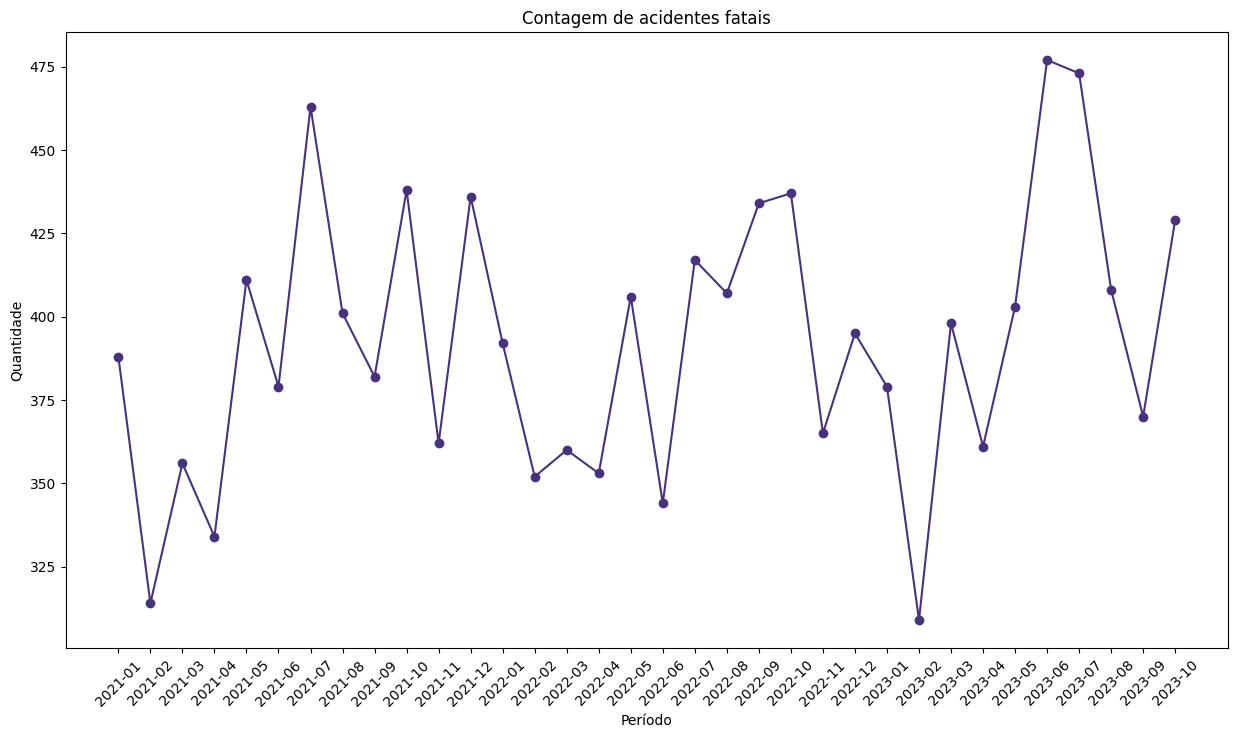

In [9]:
count_por_mes = df_obitos['ano_mes'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
plt.plot(count_por_mes.index.astype(str), count_por_mes.values, marker='o')

plt.title('Contagem de acidentes fatais')
plt.xlabel('Período')
plt.ylabel('Quantidade')

plt.xticks(rotation=45)
plt.show()

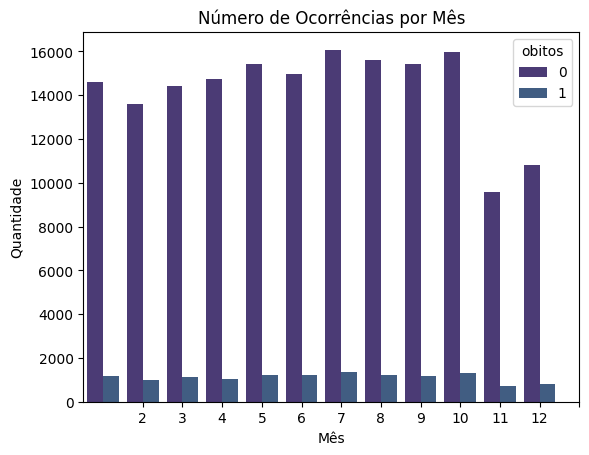

In [10]:
# Quantidade de acidentes por mês separado por target
sns.countplot(data = df, x = 'mes', hue = 'obitos')

plt.title('Número de Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.xticks(df['mes'].unique())
plt.show()

Mesmo com 2023 incompleto (dados até outubro), é nítido que, independentemente das oscilações mensais, no geral, a distribuição de acidentes, com ou sem vítimas, é muito próxima.

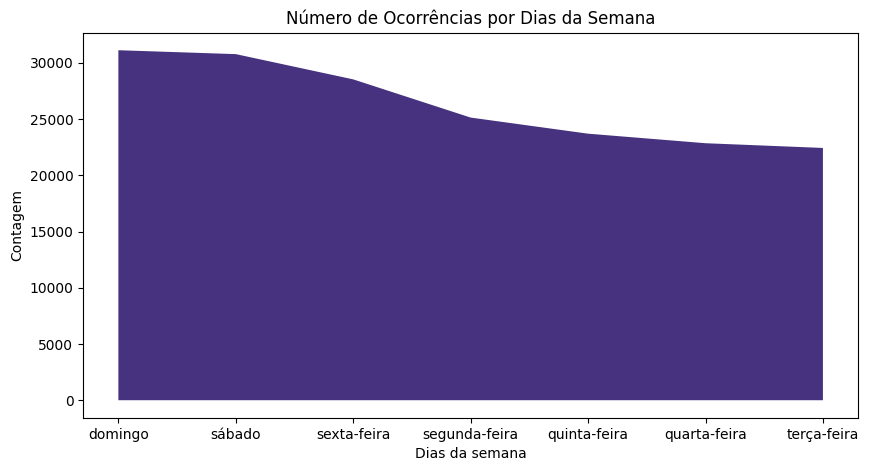

In [11]:
# Número de Ocorrências por dias da semana
plt.figure(figsize = (10,5))
plt.fill_between(df['dia_semana'].value_counts().index, df['dia_semana'].value_counts().values)

plt.xlabel('Dias da semana')
plt.ylabel('Contagem')
plt.title('Número de Ocorrências por Dias da Semana')

plt.show()

Nota-se que os dias da semana em que ocorrem mais acidentes são nos finais de semana, justamente os dias propostos para descanso e fora da rotina de trabalho.

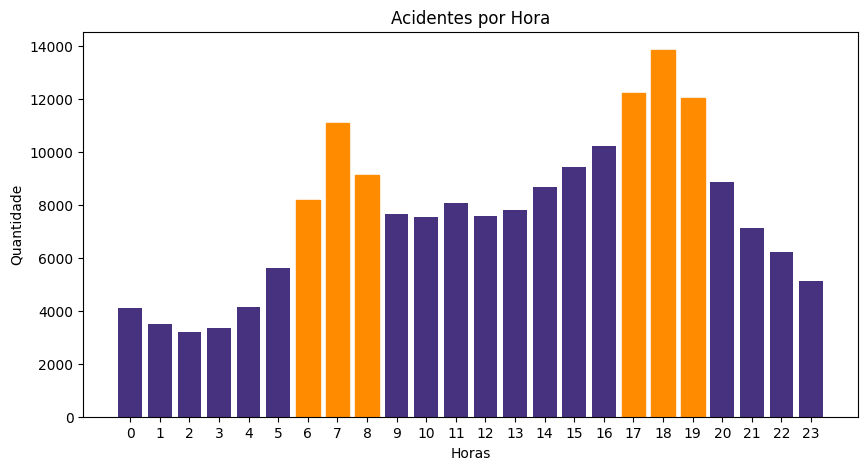

In [12]:
# Ocorrencias por horas
plt.figure(figsize=(10, 5))
bars = plt.bar(df['horas'].value_counts().index, df['horas'].value_counts().values)

# Destacar horas especificas
highlighted_bars = [6, 7, 8, 17, 18, 19]
for i, bar in enumerate(bars):
    if df['horas'].value_counts().index[i] in highlighted_bars:
        bar.set_color('darkorange')

# Configurações adicionais do gráfico
plt.title("Acidentes por Hora")
plt.xlabel("Horas")
plt.ylabel('Quantidade')
plt.xticks(df['horas'].unique())
plt.show()

Existe um crescimento inicial às 7 horas e o pico às 18 horas. Destaco uma hora antes e depois, popularmente conhecida como horários de início e fim de jornada de trabalho. É visível a concentração dos dados das 6 às 19 horas, acredito que seja devido a um fluxo maior durante o dia em comparação com a noite. Se faz necessario ver a distribuição de outra forma.

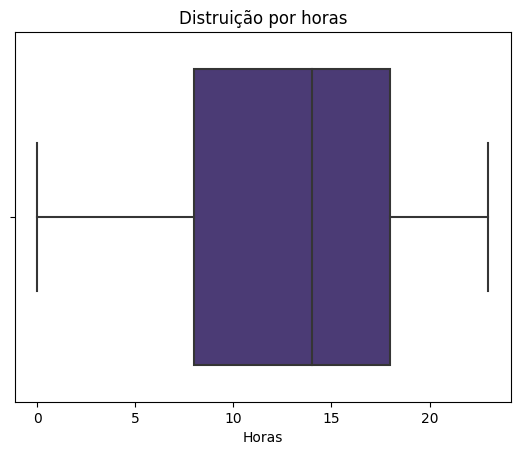

In [13]:
# Boxplot do campo horas
sns.boxplot(data = df, x = 'horas')

plt.title('Distruição por horas')
plt.xlabel('Horas')
plt.show()

Como visto no gráfico anterior, observar a distribuição via boxplot torna-se mais claro. O primeiro quartil é 8 e o terceiro quartil é 18, indicando uma faixa de 10 horas (menos da metade do total de horas em um dia) com uma concentração maior do que nos demais.

# Analise Geográfica

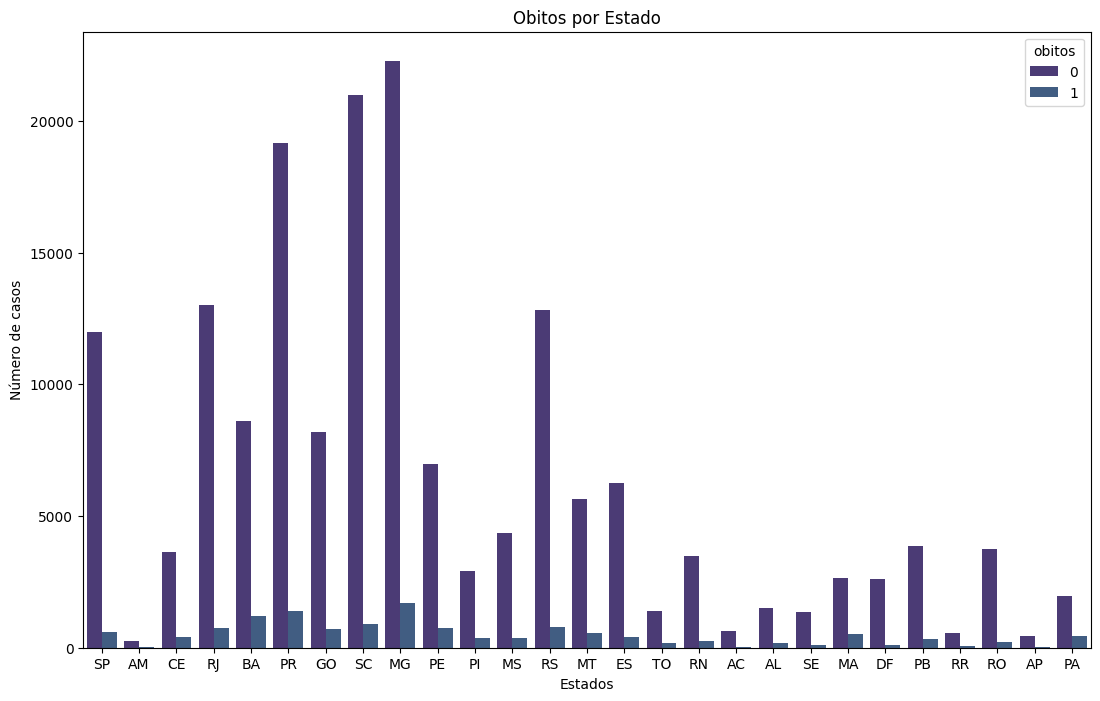

In [14]:
plt.figure(figsize = (13,8))
sns.countplot(data = df, x = 'uf', hue = 'obitos')

plt.title('Obitos por Estado')
plt.xlabel('Estados')
plt.ylabel('Número de casos')
plt.show()

Os estados que lideram o número de ocorrências são, respectivamente, Minas Gerais, Santa Catarina e Paraná, os mesmos em número de acidentes não fatais. Em acidentes fatais, os estados principais são Minas Gerais e Paraná novamente, seguidos da Bahia.

Para completar a análise, é necessário visualizar o comportamento por região.

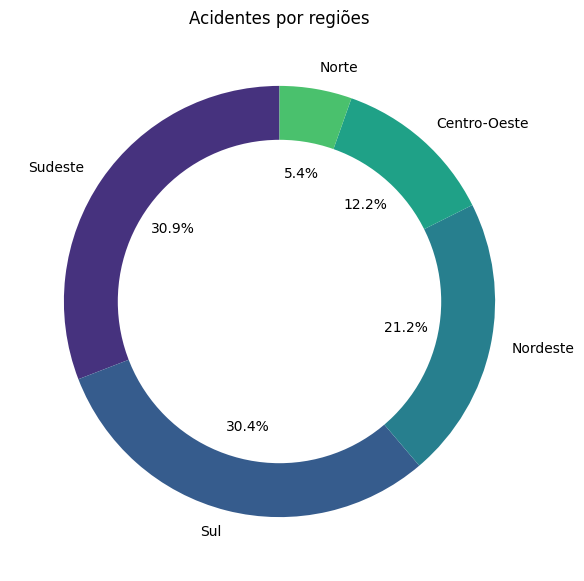

In [15]:
plt.figure(figsize=(7, 7))
df['regiao'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.75, fc='white')) # Cria um circulo branco no centro, dando efeito de "rosca"

plt.title('Acidentes por regiões')
plt.ylabel('')
plt.show()

Como suspeitado pelo gráfico anterior, as regiões que mais têm acidentes são, respectivamente, Sudeste, Sul e Nordeste. Sudeste e Sul, cobinadas, representam 60% de toda a base. Isso destaca que apenas duas das cinco regiões são responsáveis majoritariamente pelo número de ocorrências.

A base estudada contém a latitude e longitude, com isso explorarei a localização aproximada dos acidentes que possuem maior intensidade.

In [16]:
coord_centro_brasil = [-15.7801, -47.9292] # Coordenadas aproximadas do centro do Brasil
mapa = folium.Map(location=coord_centro_brasil, zoom_start=5) # Cria o mapa, zoom_start=5 para visualização completa em ipynb
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=7).add_to(mapa)  # radius=7 para as marcações ficarem menos intensas e assim mais facil visualizar

display(mapa) # Exibir o mapa

A ideia é explorar as features de latitude e longitude. Para isso, o gráfico de calor é uma ótima opção, utilizando a biblioteca Folium para criar um mapa interativo e o plugin Heatmap para transformar o mapa em um gráfico de calor.

O mapa de calor permite visualizar em que pontos das BRs ocorrencem mais acidentes, isso também aplica para os estados e regiões.

É interessante notar as concentrações que se formam, com destaque para Curitiba, Rio de Janeiro e Belo Horizonte, que possuem intensidade ao seu redor.

**Observação**: Alguns navegadores podem apresentar problemas para abrir gráficos desse tipo, portanto, deixarei em imagem por segurança.



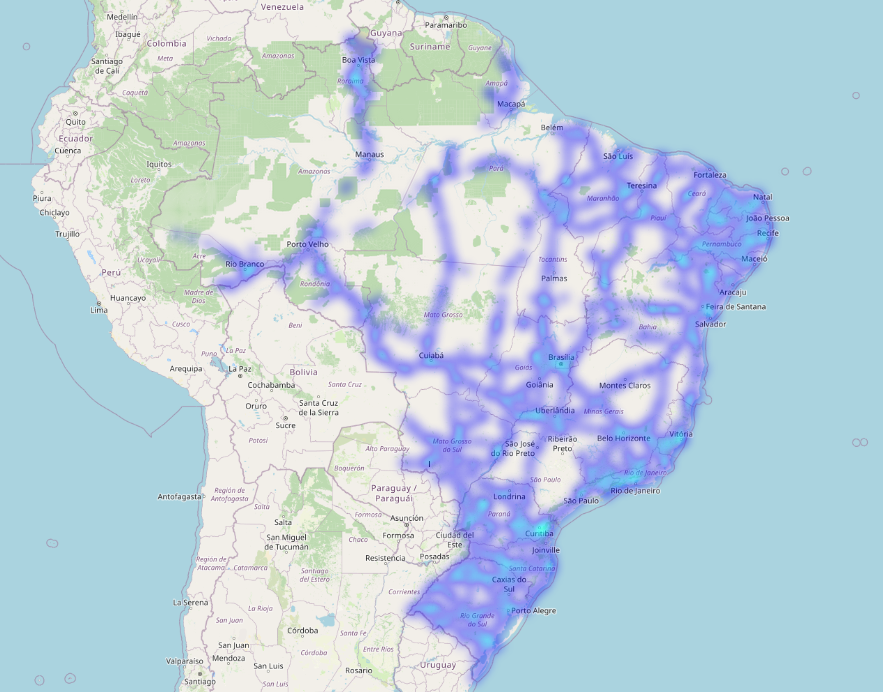


# Análise das features categóricas


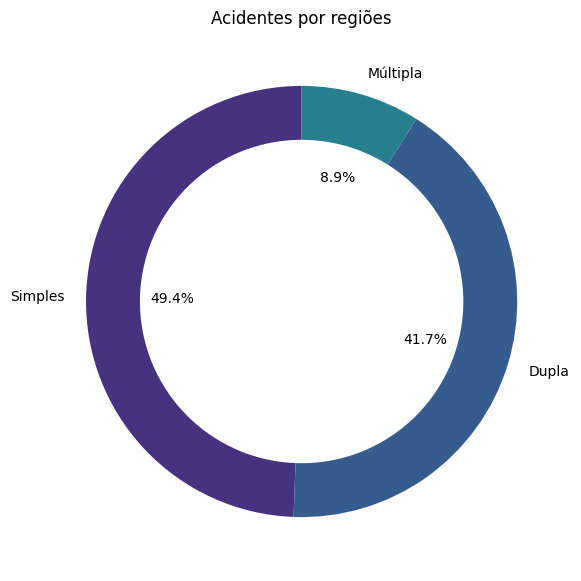

In [17]:
plt.figure(figsize=(7, 7))
df['tipo_pista'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0, 0), 0.75, fc='white')) # Cria um circulo branco no centro, dando efeito de "rosca"

plt.title('Acidentes por regiões')
plt.ylabel('')
plt.show()

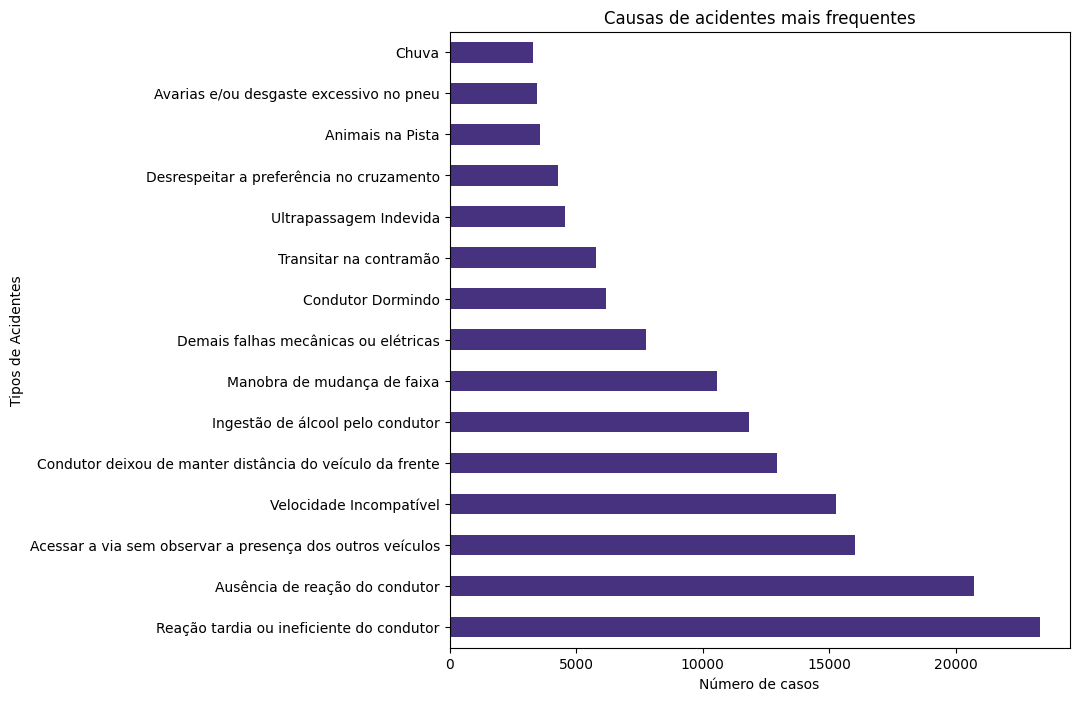

In [19]:
plt.figure(figsize=(8,8))
df['causa_acidente'].value_counts().nlargest(15).plot(kind = 'barh') # São 75 categorias com muitos caracteres logo melhor apresentar as 15 maiores
plt.title('Causas de acidentes mais frequentes')
plt.ylabel('Tipos de Acidentes')
plt.xlabel('Número de casos')
plt.show()

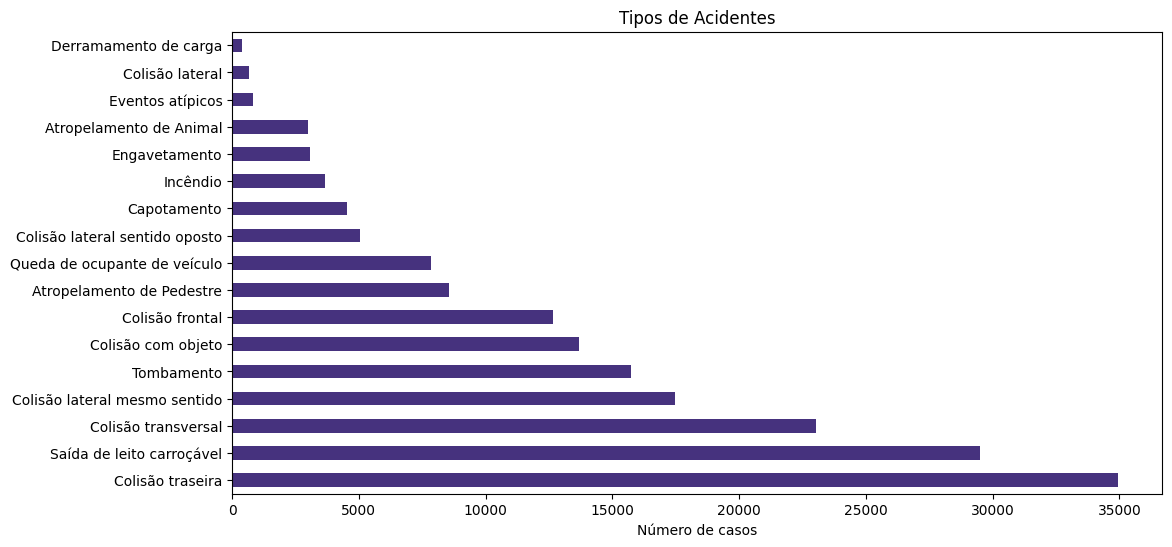

In [20]:
plt.figure(figsize = (12,6))
df['tipo_acidente'].value_counts().plot(kind = 'barh') # BARH, pois são muitas categórias e caracteres

plt.title('Tipos de Acidentes')
plt.xlabel('Número de casos')
plt.show()

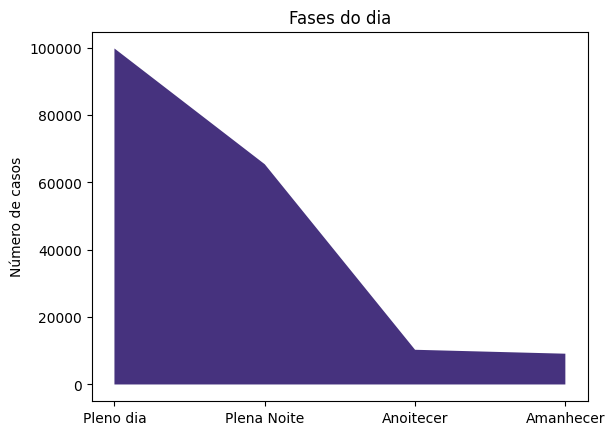

In [21]:
plt.fill_between(df['fase_dia'].value_counts().index, df['fase_dia'].value_counts().values)

plt.title('Fases do dia')
plt.ylabel('Número de casos')
plt.show()

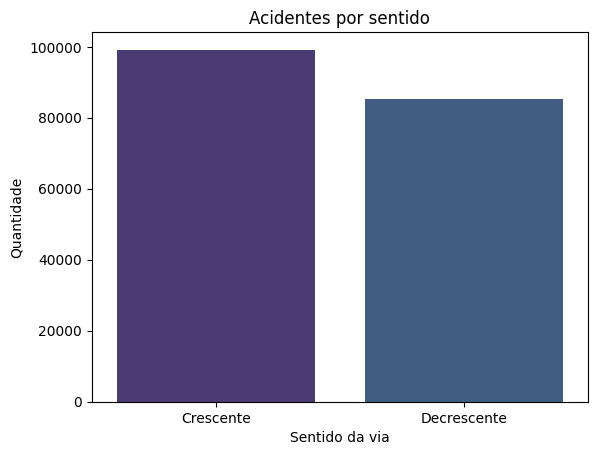

In [22]:
sns.countplot(data = df , x = 'sentido_via')

plt.title('Acidentes por sentido')
plt.xlabel('Sentido da via')
plt.ylabel('Quantidade')
plt.show()

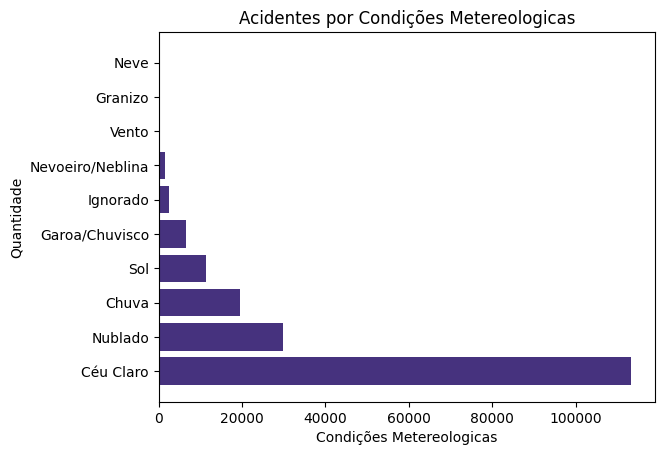

In [23]:
plt.barh(df['condicao_metereologica'].value_counts().index, df['condicao_metereologica'].value_counts().values)

plt.title('Acidentes por Condições Metereologicas')
plt.xlabel('Condições Metereologicas')
plt.ylabel('Quantidade')
plt.show()

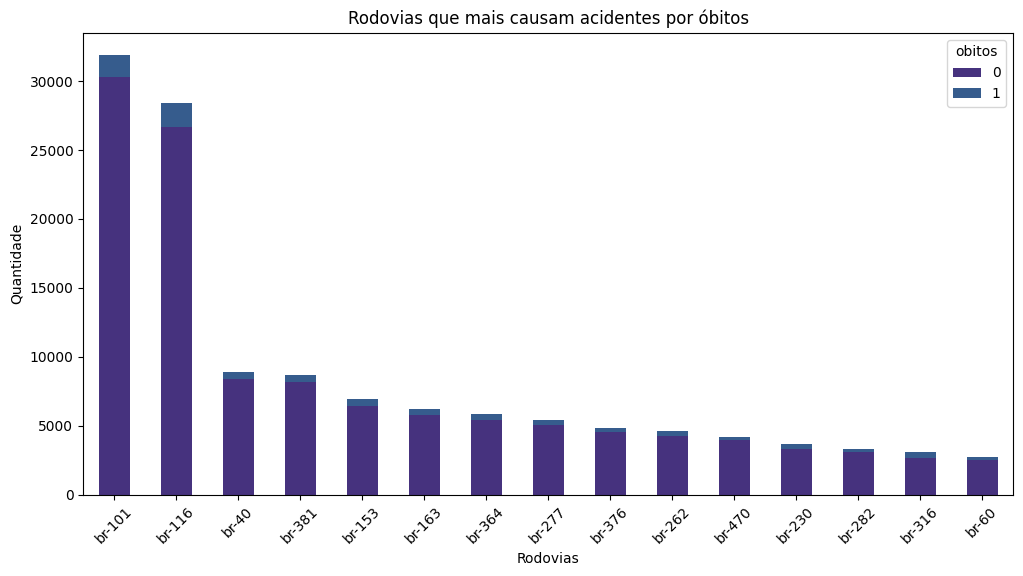

In [27]:
top_15_rodovias = df['br'].value_counts().nlargest(15).index

# Filtrar o DataFrame para incluir apenas as 15 rodovias
df_top_15 = df[df['br'].isin(top_15_rodovias)]

# Obter a ordem decrescente das rodovias com base na quantidade de acidentes
ordem_rodovias = df_top_15.groupby('br').size().sort_values(ascending=False).index

# Criar gráfico de barras empilhado
df_top_15.groupby(['br', 'obitos']).size().unstack().loc[ordem_rodovias].plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionar rótulos e título
plt.title('Rodovias que mais causam acidentes por óbitos')
plt.xlabel('Rodovias')
plt.ylabel('Quantidade')

plt.xticks(rotation=45)
plt.show()

## Teste Qui-Quadrado

In [39]:
from scipy.stats import chi2_contingency

In [ ]:
# Tabela de contingência
tabela_qui_quadrado = pd.crosstab(df['DMDEDUC_cat'], df['RIAGENDR_cat'])

# Realizar o teste qui-quadrado
chi2, p, _, _ = chi2_contingency(tabela_qui_quadrado)

# Exibir resultados
print("\nResultado do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2}")
print(f"Valor p: {p}")

In [ ]:
# Verificar se o resultado é estatisticamente significativo (geralmente, usa-se um nível de significância de 0.05)
alpha = 0.05
if p < alpha:
    print("\nConclusão: Rejeitamos a hipótese nula (as variáveis são independentes).")
else:
    print("\nConclusão: Não rejeitamos a hipótese nula (as variáveis são independentes).")

# Análise das features númericas

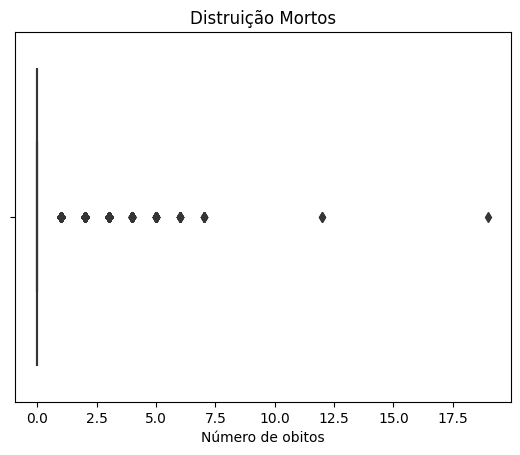

In [29]:
sns.boxplot(data = df, x = 'mortos')
plt.title('Distruição Mortos')
plt.xlabel('Número de obitos')
plt.show()

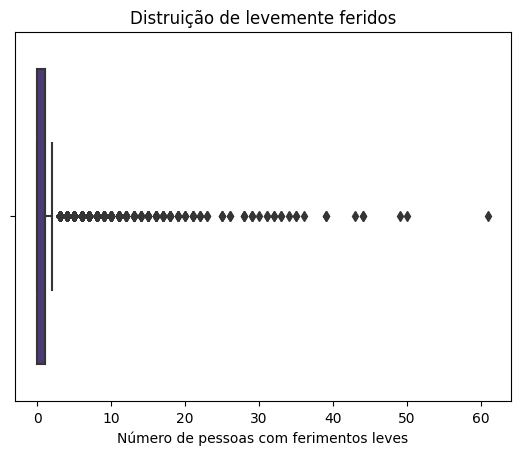

In [30]:
sns.boxplot(data = df, x = 'feridos_leves')
plt.title('Distruição de levemente feridos')
plt.xlabel('Número de pessoas com ferimentos leves')
plt.show()

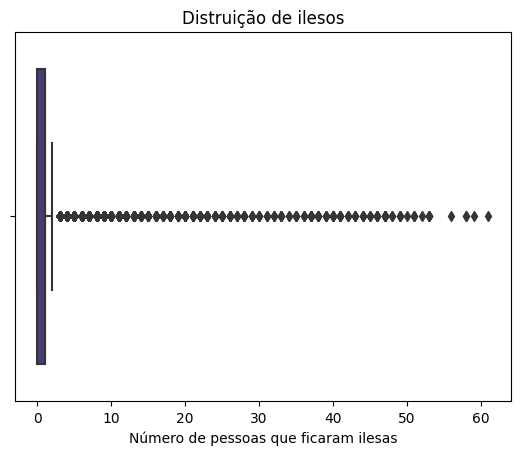

In [31]:
sns.boxplot(data = df, x = 'ilesos')
plt.title('Distruição de ilesos')
plt.xlabel('Número de pessoas que ficaram ilesas')
plt.show()

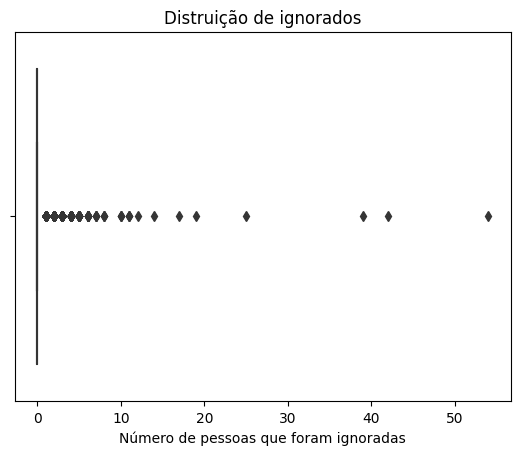

In [32]:
sns.boxplot(data = df, x = 'ignorados')
plt.title('Distruição de ignorados')
plt.xlabel('Número de pessoas que foram ignoradas')
plt.show()

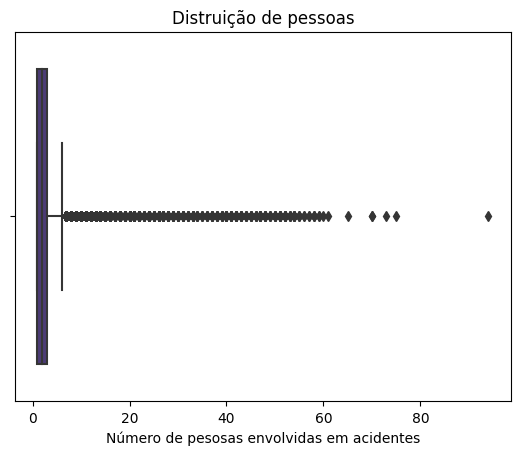

In [33]:
sns.boxplot(data = df, x = 'pessoas')
plt.title('Distruição de pessoas')
plt.xlabel('Número de pesosas envolvidas em acidentes')
plt.show()

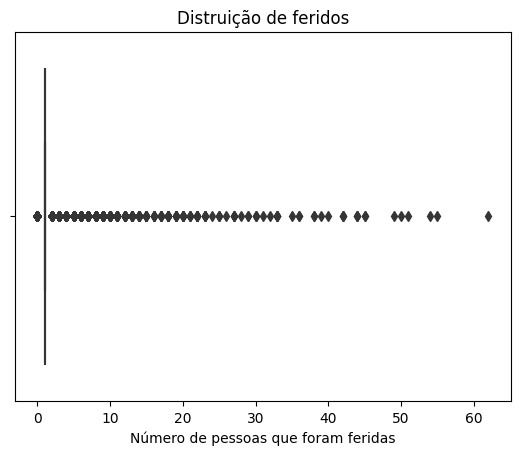

In [34]:
sns.boxplot(data = df, x = 'feridos')
plt.title('Distruição de feridos')
plt.xlabel('Número de pessoas que foram feridas')
plt.show()

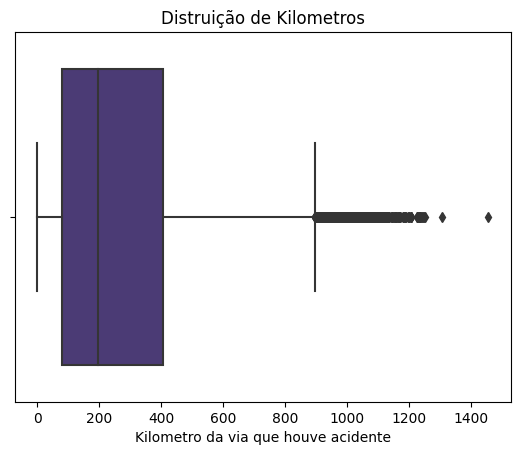

In [35]:
sns.boxplot(data = df, x = 'km')
plt.title('Distruição de Kilometros')
plt.xlabel('Kilometro da via que houve acidente')
plt.show()

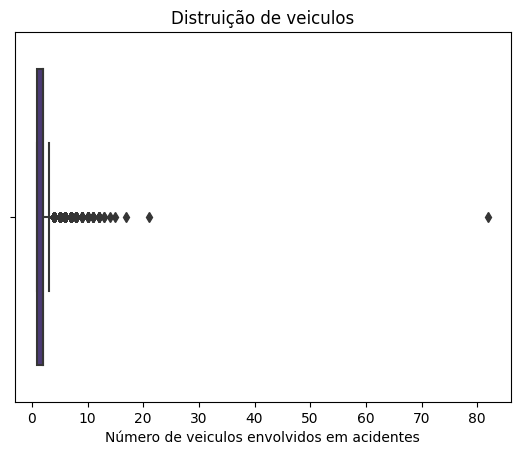

In [36]:
sns.boxplot(data = df, x = 'veiculos')
plt.title('Distruição de veiculos')
plt.xlabel('Número de veiculos envolvidos em acidentes')
plt.show()

In [37]:
df.describe()

id             km        pessoas         mortos  \
count  184550.000000  184550.000000  184550.000000  184550.000000   
mean   447814.706643     260.089435       2.396933       0.083815   
std     67970.818862     225.583567       2.047516       0.335973   
min    331693.000000       0.000000       1.000000       0.000000   
25%    385521.250000      79.000000       1.000000       0.000000   
50%    456094.500000     196.000000       2.000000       0.000000   
75%    507705.500000     406.100000       3.000000       0.000000   
max    565013.000000    1454.500000      94.000000      19.000000   

       feridos_leves  feridos_graves         ilesos      ignorados  \
count  184550.000000   184550.000000  184550.000000  184550.000000   
mean        0.853102        0.277432       1.020834       0.161750   
std         1.065421        0.613935       1.614838       0.484576   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000       0.000000       0.000000   
50%         1.000000        0.000000       1.000000       0.000000   
75%         1.000000        0.000000       1.000000       0.000000   
max        61.000000       31.000000      61.000000      54.000000   

             feridos       veiculos       latitude      longitude  \
count  184550.000000  184550.000000  184550.000000  184550.000000   
mean        1.130534       1.660829     -18.972294     -46.637720   
std         1.188340       0.748797       7.740574       6.170531   
min         0.000000       1.000000     -33.689819     -72.119380   
25%         1.000000       1.000000     -25.339284     -50.392902   
50%         1.000000       2.000000     -20.501976     -47.766422   
75%         1.000000       2.000000     -12.918886     -42.634363   
max        62.000000      82.000000       4.461419     -34.828232   

                 ano            mes            dia          horas  \
count  184550.000000  184550.000000  184550.000000  184550.000000   
mean     2021.950826       6.322807      15.624389      12.903322   
std         0.804880       3.304985       8.785810       6.108236   
min      2021.000000       1.000000       1.000000       0.000000   
25%      2021.000000       4.000000       8.000000       8.000000   
50%      2022.000000       6.000000      16.000000      14.000000   
75%      2023.000000       9.000000      23.000000      18.000000   
max      2023.000000      12.000000      31.000000      23.000000   

             minutos         obitos  
count  184550.000000  184550.000000  
mean       24.281626       0.072246  
std        17.476156       0.258896  
min         0.000000       0.000000  
25%        10.000000       0.000000  
50%        25.000000       0.000000  
75%        40.000000       0.000000  
max        59.000000       1.000000

In [38]:
df.to_csv('Federal_Accidents_Statistic.csv', index = False, encoding='ISO-8859-1')